# Pronóstico de la evolución de pacientes con diabetes

## Descripción del problema real

Los tratamientos médicos están basados en las expectativas de recuperación o el avance de una enfermedad para tomar decisiones. En este caso, un equipo médico desea contar con pronósticos de pacientes con diabetes para tomar decisiones sobre su tratamiento.

## Descripción del problema en términos de los datos

Se desea determinar el progreso de la diabeteis un año hacia adelante a partir de las variables medidas para 442 pacientes. La información está almacenada en el archivo `datos/diabetes.csv`. Las variables medidas son: edad, sexo, indice de masa corporal, presión sanguinea y seis medidas de serum en la sangre. Se desea pronósticar el progreso de la enfermedad a partir de las variables dadas.

## Aproximaciones posibles

En este caso, se desea comparar los resultados de un modelo de regresión lineal y un modelo de redes neuronales artificiales.

## Requerimientos

Usted debe:

* Determinar cuáles de las variables consideradas son relevantes para el problema.


* Determinar si hay alguna transformación de las variables de entrada o de salida que mejore el pronóstico del modelo.


* Construir un modelo de regresión lineal que sirva como base para construir un modelo de redes neuronales artificiales.



* Construir un modelo de redes neuronales artificiales. Asimismo, debe determinar el número de neuronas en la capa o capas ocultas.


* Utiizar una técnica como crossvalidation u otra similar para establecer la robustez del modelo.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import os
import numpy as np
import math
import scipy
from tqdm import tqdm_notebook as tqdm
import seaborn as sns

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Y
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0
441,-0.045472,-0.044642,-0.073030,-0.081414,0.083740,0.027809,0.173816,-0.039493,-0.004220,0.003064,57.0


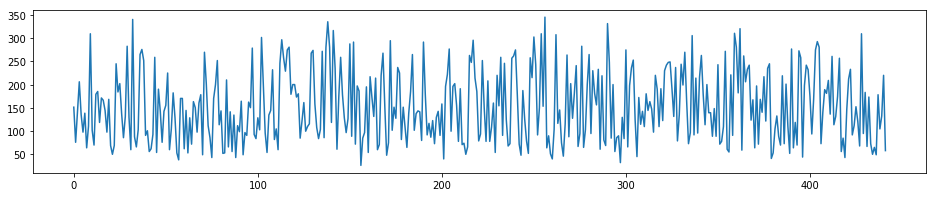

In [2]:
data_path = "datos/diabetes.csv"
data = pd.read_csv(data_path)
plt.figure(figsize=(16,3))
plt.plot(data["Y"])
data.tail()


In [3]:
data.isnull().sum()

age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
Y      0
dtype: int64

In [4]:
pd.options.display.float_format = '{:.6}'.format
data.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Y
count,442.0,442.0,442.0,442.0,442.0,442.0,442.0,442.0,442.0,442.0,442.0
mean,-3.6346e-16,1.29641e-16,-8.04221e-16,1.28165e-16,-8.83532e-17,1.32702e-16,-4.57527e-16,3.78076e-16,-3.83085e-16,-3.41195e-16,152.133
std,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,77.093
min,-0.107226,-0.0446416,-0.0902753,-0.1124,-0.126781,-0.115613,-0.102307,-0.0763945,-0.126097,-0.137767,25.0
25%,-0.0372993,-0.0446416,-0.0342291,-0.0366564,-0.0342478,-0.0303584,-0.0351172,-0.0394934,-0.0332488,-0.033179,87.0
50%,0.00538306,-0.0446416,-0.00728377,-0.00567061,-0.00432087,-0.00381907,-0.00658447,-0.00259226,-0.00194763,-0.0010777,140.5
75%,0.0380759,0.0506801,0.031248,0.0356438,0.028358,0.0298444,0.0293115,0.0343089,0.0324332,0.0279171,211.5
max,0.110727,0.0506801,0.170555,0.132044,0.153914,0.198788,0.181179,0.185234,0.133599,0.135612,346.0


In [5]:
from sklearn import linear_model
import statsmodels.api as sm

In [6]:
X = data[["age", "sex", "bmi", "bp","s1","s2","s3","s4","s5","s6"]]
Y = data["Y"]

regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


Intercept: 
 152.1334841628965
Coefficients: 
 [ -10.01219782 -239.81908937  519.83978679  324.39042769 -792.18416163
  476.74583782  101.04457032  177.06417623  751.27932109   67.62538639]


In [7]:
# with statsmodels
X2 = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X2).fit()
predictions = model.predict(X2) 
 
print_model = model.summary()
print(print_model)

C:\Users\DavidChaverraMunera\Anaconda3\envs\deep_learning\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Tue, 09 Apr 2019   Prob (F-statistic):           3.83e-62
Time:                        23:24:01   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.576     59.061      0.0

SSE is :53.47607314274362


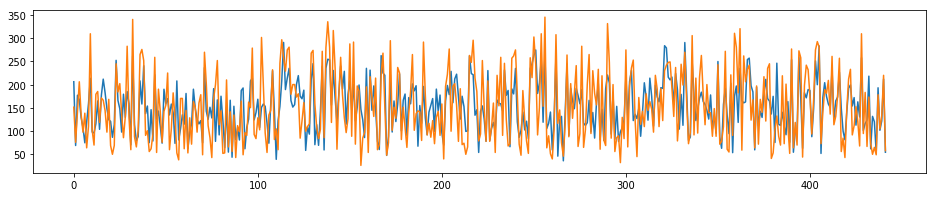

In [8]:
plt.figure(figsize=(16,3))
plt.plot(predictions)
plt.plot(data["Y"])

def get_SSE(y_pred, y_desired):
    return sklearn.metrics.mean_squared_error(y_desired, y_pred, sample_weight=None)
print("SSE is :" + str(get_SSE(predictions, data["Y"])**(1/2)))

In [9]:
from tqdm import tqdm_notebook as tqdm
class Linear_Model(object):
    def __init__(self, n_features):
        self.errs = []
        self.w = np.zeros(n_features + 1)
        self.last_delta = np.zeros(n_features + 1)
        self.fitting = False
        
    def init_weights(self, ws):
        self.w = ws
        print("Weights loaded")

    def __call__(self, x):     
        if self.fitting is False:
            x = [[1] + e for e in x]
            x = np.array(x)
            
        y_prd = np.matmul(self.w, x.T)
        #print(y_prd)
        return y_prd

    def fit_batch(self, mu, max_iters, x, d):
        #self.w = np.zeros(len(self.w))
        self.errs = []
        x = x.copy(deep=True)
        x = x.values.tolist()
        x = [[1] + e for e in x]
        d = d.copy(deep=True)
        d = d.values
        x = np.array(x)
        self.fitting = True
        
        for i in tqdm(range(max_iters)):

            pred = self(x)
            e = d - pred
            self.errs.append(sklearn.metrics.mean_squared_error(d, pred, sample_weight=None)**(1/2))
            e =  np.matmul(e, x)/len(e)
            delta =  mu * e
            self.w = self.w + delta
            
        self.fitting = False

    def fit(self, mu, x, d):
        #self.w = np.zeros(len(self.w))
        self.errs = []
        x = x.copy(deep=True)
        x.insert(0, "m_ones", 1, allow_duplicates = False)
        x = x.values
        d = d.copy(deep=True)
        d = d.values.tolist()
        for (row, r_d) in zip(x,d):
            e = r_d - self([row[1:].tolist()])
            self.errs.append(e)
            delta =  mu * e.T * row
            self.w = self.w + delta
            
    def fit_momentum(self, mu, mu2, x, d):
        self.errs = []
        x = x.copy(deep=True)
        
        x.insert(0, "m_ones", 1, allow_duplicates = False)
        x = x.values
        d = d.copy(deep=True)
        d = d.values.tolist()
        
        for (row, r_d) in zip(x,d):
            e = r_d - self([row[1:].tolist()])
            self.errs.append(e)
            delta =  (mu * e * row) + (self.last_delta)
            self.last_delta = delta
            self.w = self.w - delta


In [10]:
def best_fit_mu(X, Y, nmodel):
    best_mu = 0.001
    lowest_e = 999999
    
    for mu in tqdm(np.arange(0.001, 0.8, step=0.001)):
        #print(mu)
        nmodel.fit(mu, X, Y)
        y_pred = nmodel(X.values.tolist())
        mse = sklearn.metrics.mean_squared_error(Y, y_pred, sample_weight=None)
        if(mse < lowest_e):
            lowest_e = mse
            best_mu = mu
    print("Best mu is: " + str(best_mu))
    return best_mu

def best_fit_mu_mu2(X, Y, nmodel):
    best_mu = 0.001
    best_mu2 = 0.001
    lowest_e = 999999
    
    for mu in tqdm(np.arange(0.001, 0.5, step=0.01)):
        #print(mu)
        for mu2 in np.arange(0.001, 0.5, step=0.01):
            nmodel.fit_momentum(mu, mu2, X, Y)
            y_pred = nmodel(X.values.tolist())
            mse = sklearn.metrics.mean_squared_error(Y, y_pred, sample_weight=None)
            print(mse)
            if(mse < lowest_e):
                lowest_e = mse
                best_mu = mu
    print("Best mu is: " + str(best_mu))
    return best_mu, best_mu2


MSE is: 53.63857149525503


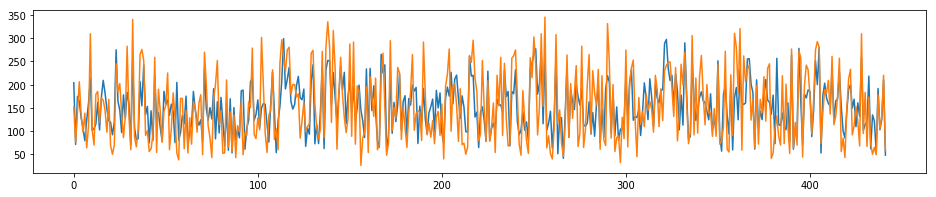

In [11]:
X = data[["age", "sex", "bmi", "bp","s1","s2","s3","s4","s5","s6"]]
Y = data["Y"]
nn_model_batch = Linear_Model(len(X.columns))
nn_model_batch.fit_batch(0.33, 20000, X, Y)

plt.figure(figsize=(16,3))
y_pred = nn_model_batch(X.values.tolist())
print("MSE is: " + str(sklearn.metrics.mean_squared_error(data["Y"], y_pred, sample_weight=None)**(1/2)))

#plt.plot(nn_model_batch.errs)
plt.plot(y_pred)
plt.plot(Y)


Best mu is: 0.337
MSE is: 54.53973441662325


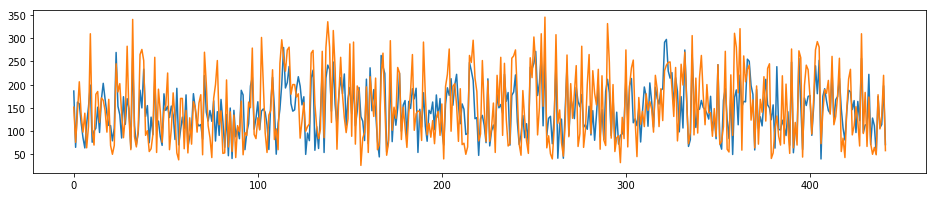

In [12]:
plt.figure(figsize=(16,3))
X = data[["age", "sex", "bmi", "bp","s1","s2","s3","s4","s5","s6"]]
Y = data["Y"]
nn_model = Linear_Model(len(X.columns))
bmu = best_fit_mu(X,Y,nn_model)
nn_model.fit(bmu, X, Y)

pred = nn_model(X.values.tolist())
print("MSE is: " + str(sklearn.metrics.mean_squared_error(data["Y"], pred, sample_weight=None)**(1/2)))
plt.plot(pred)
plt.plot(data["Y"])


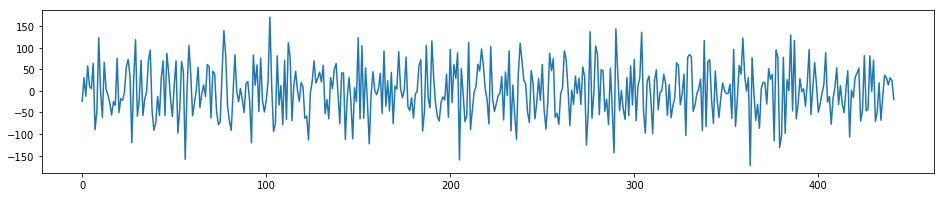

In [13]:
plt.figure(figsize=(16,3))
plt.plot(nn_model.errs)

In [14]:
X = data[["age", "sex", "bmi", "bp","s1","s2","s3","s4","s5","s6"]]
Y = data["Y"]
nn_model2 = Linear_Model(len(X.columns))



Weights loaded



MSE is: 53.47607314274362


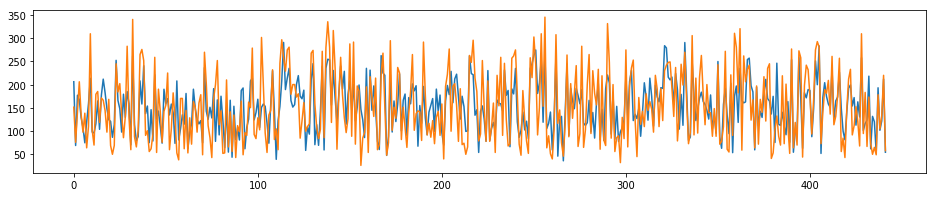

In [15]:
X = data[["age", "sex", "bmi", "bp","s1","s2","s3","s4","s5","s6"]]
Y = data["Y"]
nn_model_batch = Linear_Model(len(X.columns))
nn_model_batch.init_weights(model.params.values)
nn_model_batch.fit_batch(0.33, 20000, X, Y)

plt.figure(figsize=(16,3))
y_pred = nn_model_batch(X.values.tolist())
print("MSE is: " + str(sklearn.metrics.mean_squared_error(data["Y"], y_pred, sample_weight=None)**(1/2)))

#plt.plot(nn_model_batch.errs)
plt.plot(y_pred)
plt.plot(Y)


In [16]:
# with statsmodels
X2 = sm.add_constant(X.drop(["age", "s3", "s6"], axis=1)) # adding a constant
 
model = sm.OLS(Y, X2).fit()
predictions = model.predict(X2) 
 
print_model = model.summary()
print(print_model)

C:\Users\DavidChaverraMunera\Anaconda3\envs\deep_learning\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     66.18
Date:                Tue, 09 Apr 2019   Prob (F-statistic):           1.48e-64
Time:                        23:24:51   Log-Likelihood:                -2386.7
No. Observations:                 442   AIC:                             4789.
Df Residuals:                     434   BIC:                             4822.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.571     59.177      0.0

SSE is :53.556860308689515


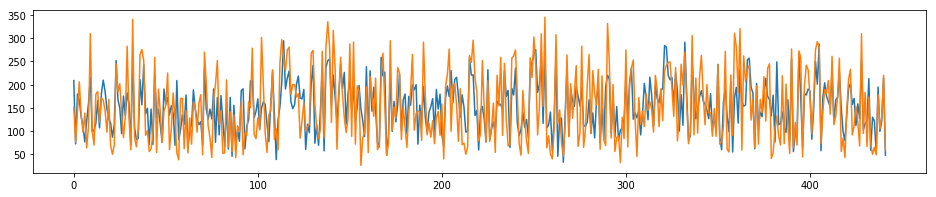

In [17]:
plt.figure(figsize=(16,3))
plt.plot(predictions)
plt.plot(data["Y"])

def get_SSE(y_pred, y_desired):
    return sklearn.metrics.mean_squared_error(y_desired, y_pred, sample_weight=None)
print("SSE is :" + str(get_SSE(predictions, data["Y"])**(1/2)))


MSE is: 53.63857149525503


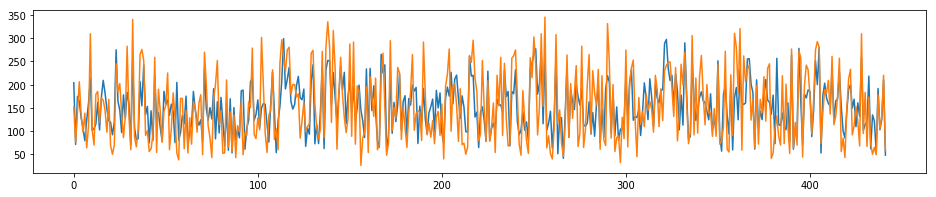

In [18]:
X = data[["age", "sex", "bmi", "bp","s1","s2","s3","s4","s5","s6"]]
Y = data["Y"]
nn_model_batch = Linear_Model(len(X.columns))
#nn_model_batch.init_weights(model.params.values)
nn_model_batch.fit_batch(0.33, 20000, X, Y)

plt.figure(figsize=(16,3))
y_pred = nn_model_batch(X.values.tolist())
print("MSE is: " + str(sklearn.metrics.mean_squared_error(data["Y"], y_pred, sample_weight=None)**(1/2)))

#plt.plot(nn_model_batch.errs)
plt.plot(y_pred)
plt.plot(Y)

MSE is: 54.34153194662728


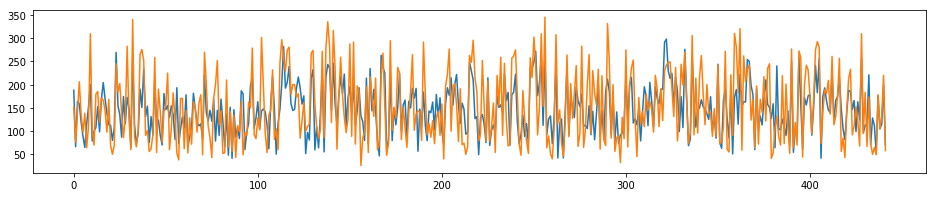

In [19]:
plt.figure(figsize=(16,3))

nn_model.fit(bmu, X, Y)

pred = nn_model(X.values.tolist())
print("MSE is: " + str(sklearn.metrics.mean_squared_error(data["Y"], pred, sample_weight=None)**(1/2)))
plt.plot(pred)
plt.plot(data["Y"])


In [ ]:

#nn_model = Linear_Model(len(X.columns))
#bmu = best_fit_mu(X,Y,nn_model)a

In [20]:
from sklearn import preprocessing

X = data[["sex", "bmi", "bp","s1","s2","s4","s5","Y"]]
plt.figure(figsize=(14,3))


scaler = preprocessing.MinMaxScaler()
print(scaler.fit(X))
X = pd.DataFrame(scaler.transform(X), index=X.index, columns=X.columns)
Y = X["Y"]
X = X.drop("Y", axis = 1)



#X = X.drop("Y", axis=1)
#plt.plot(Y)

MinMaxScaler(copy=True, feature_range=(0, 1))


<Figure size 1008x216 with 0 Axes>


MSE is: 0.16684386856492425


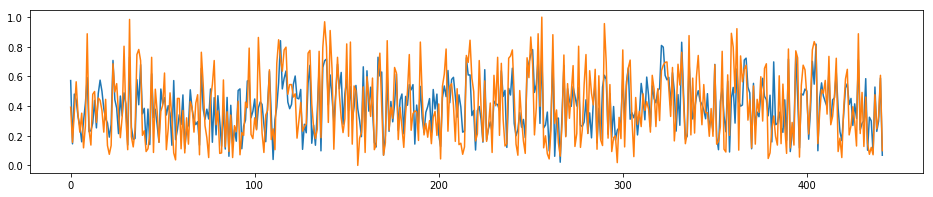

In [21]:
nn_model_batch = Linear_Model(len(X.columns))
#nn_model_batch.init_weights(model.params.values)
nn_model_batch.fit_batch(0.33, 20000, X, Y)

plt.figure(figsize=(16,3))
y_pred = nn_model_batch(X.values.tolist())
print("MSE is: " + str(sklearn.metrics.mean_squared_error(Y, y_pred, sample_weight=None)**(1/2)))

#plt.plot(nn_model_batch.errs)
plt.plot(y_pred)
plt.plot(Y)


In [24]:
plt.figure(figsize=(16,3))
X["Y"] = y_pred
X_r = pd.DataFrame(scaler.inverse_transform(X), index=X.index, columns=X.columns)
print("MSE is: " + str(sklearn.metrics.mean_squared_error(data["Y"], X_r["Y"], sample_weight=None)**(1/2)))


MSE is: 53.556881809340695


<Figure size 1152x216 with 0 Axes>

In [25]:
# with statsmodels
X2 = X
 
model = sm.OLS(Y, X2).fit()
predictions = model.predict(X2) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     66.18
Date:                Tue, 09 Apr 2019   Prob (F-statistic):           1.48e-64
Time:                        23:26:47   Log-Likelihood:                 164.32
No. Observations:                 442   AIC:                            -312.6
Df Residuals:                     434   BIC:                            -279.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
sex            0.0005      0.079      0.006      0.9

SSE is :0.16684380158470252


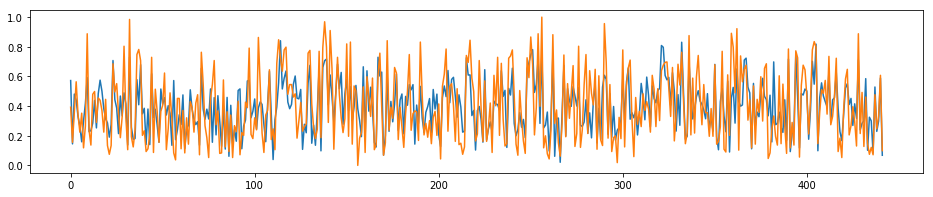

In [26]:
plt.figure(figsize=(16,3))
plt.plot(predictions)
plt.plot(Y)

def get_SSE(y_pred, y_desired):
    return sklearn.metrics.mean_squared_error(y_desired, y_pred, sample_weight=None)
print("SSE is :" + str(get_SSE(predictions, Y)**(1/2)))

In [31]:
plt.figure(figsize=(16,3))
X = data[["sex", "bmi", "bp","s1","s2","s4","s5","Y"]]
from sklearn.model_selection import KFold
kf = KFold(n_splits = 5, shuffle = True, random_state = 2)

mses = []

for i in range(5):
    result = next(kf.split(X), None)

    x_train = X.iloc[result[0]]
    y_train = x_train["Y"]
    x_train = x_train.drop("Y", axis=1)
    x_test = X.iloc[result[1]]
    y_test = x_test["Y"]
    x_test = x_test.drop("Y", axis=1)
    nn_model_batch = Linear_Model(len(x_train.columns))
    #nn_model_batch.init_weights(model.params.values)
    nn_model_batch.fit_batch(0.33, 20000, x_train, y_train)

    y_train_pred = nn_model_batch(x_train.values.tolist())
    mses.append(sklearn.metrics.mean_squared_error(y_train, y_train_pred, sample_weight=None)**(1/2))

<Figure size 1152x216 with 0 Axes>

In [33]:
print("Mean mse is :" + str(sum(mses)/len(mses)))

Mean mse is :53.3013210447056


MSE is: 53.30132104470561


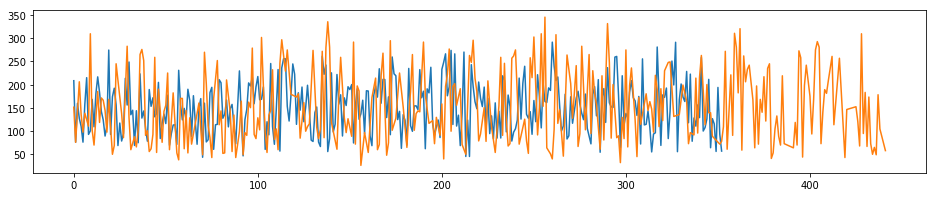

In [32]:
plt.figure(figsize=(16,3))
y_train_pred = nn_model_batch(x_train.values.tolist())
print("MSE is: " + str(sklearn.metrics.mean_squared_error(y_train, y_train_pred, sample_weight=None)**(1/2)))

#plt.plot(nn_model_batch.errs)
plt.plot(y_train_pred)
plt.plot(y_train)

In [ ]:
plt.figure(figsize=(16,3))
X = data[["sex", "bmi", "bp","s1","s2","s4","s5","Y"]]
from sklearn.model_selection import KFold
erros = []
for i in range(10):
    kf = KFold(n_splits = 5, shuffle = True, random_state = 2)
    result = next(kf.split(X), None)

    x_train = X.iloc[result[0]]
    y_train = x_train["Y"]
    x_train = x_train.drop("Y", axis=1)
    x_test = X.iloc[result[1]]
    y_test = x_test["Y"]
    x_test = x_test.drop("Y", axis=1)

    nn_model_batch = Linear_Model(len(x_train.columns))
    #nn_model_batch.init_weights(model.params.values)
    nn_model_batch.fit_batch(0.33, 20000, x_train, y_train)
    
    y_test_pred = nn_model_batch(x_test.values.tolist())
    erros.append(sklearn.metrics.mean_squared_error(y_test, y_test_pred, sample_weight=None)**(1/2))
    
    

In [21]:
print("Mean error of kfold " + str(sum(erros)/len(erros)))

Mean error of kfold 55.61028147560857
